# Gradient Boost

In [1]:
# Preload packages

import pyspark

from pyspark.sql import SparkSession
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.sql import functions as fn, Row
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
# dataframe functions
from pyspark.sql import functions as fn
from sklearn.metrics import f1_score

ModuleNotFoundError: No module named 'pyspark'

In [2]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml import Pipeline
import pandas as pd
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import numpy as np
from sklearn.model_selection import train_test_split
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

ModuleNotFoundError: No module named 'pyspark'

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pyspark.ml.classification import GBTClassifier

ModuleNotFoundError: No module named 'pyspark'

## Load data and clean dataset

In [6]:
feature_selected_data = pd.read_csv('Step02_updated02.csv',sep = ',')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
feature_selected_data.head()

,channelGrouping,fullVisitorId,visitId,visitNumber,deviceCategory,isMobile,country,totalshits,totalspageviews,totalssessionQualityDim,...,transactionRevenue,transactions,Nbrowsers,Noperatingsystem,Ntotalsbounces,NtotalsnewVisits,NadwordsClickInfoisVideoAd,NisTrueDirect,NtrafficSourcemedium,NtrafficSourcesource
0,Referral,8934116514970143966,1508176307,6,desktop,False,United States,2,2,2,...,0,0,Chrome,others,0,0,0,0,referral,google
1,Direct,7992466427990357681,1508201613,1,mobile,True,United States,2,2,1,...,0,0,Chrome,Android,0,1,0,1,others,others
2,Referral,166277907528479249,1508196701,1,desktop,False,United States,2,2,2,...,0,0,Chrome,Macintosh,0,1,0,0,others,others
3,Organic Search,5983987899933814948,1508177658,1,mobile,True,United States,2,2,1,...,0,0,Safari,iOS,0,1,0,0,organic,google
4,Paid Search,6135613929977117121,1508166431,10,mobile,True,United States,2,2,1,...,0,0,Safari,iOS,0,0,0,0,cpc,google


In [8]:
feature_selected_data['NtrafficSourcesource'].unique()

array(['google', 'others', 'youtube'], dtype=object)

### Define numbers to categorical variables

In [9]:
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Referral'] = 1
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Direct'] = 2
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Organic Search'] = 3
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Paid Search'] = 4
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Display'] = 5
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Social'] = 6
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == 'Affiliates'] = 7
feature_selected_data.channelGrouping[feature_selected_data.channelGrouping == '(Other)'] = 8

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-p

In [10]:
feature_selected_data.deviceCategory[feature_selected_data.deviceCategory == 'desktop'] = 1
feature_selected_data.deviceCategory[feature_selected_data.deviceCategory == 'mobile'] = 2
feature_selected_data.deviceCategory[feature_selected_data.deviceCategory == 'tablet'] = 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
feature_selected_data.Nbrowsers[feature_selected_data.Nbrowsers == 'Chrome'] = 1
feature_selected_data.Nbrowsers[feature_selected_data.Nbrowsers == 'Safari'] = 2
feature_selected_data.Nbrowsers[feature_selected_data.Nbrowsers == 'others'] = 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
feature_selected_data.Noperatingsystem[feature_selected_data.Noperatingsystem == 'others'] = 1
feature_selected_data.Noperatingsystem[feature_selected_data.Noperatingsystem == 'Android'] = 2
feature_selected_data.Noperatingsystem[feature_selected_data.Noperatingsystem == 'Macintosh'] = 3
feature_selected_data.Noperatingsystem[feature_selected_data.Noperatingsystem == 'iOS'] = 4
feature_selected_data.Noperatingsystem[feature_selected_data.Noperatingsystem == 'Windows'] = 5

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-p

In [13]:
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'referral'] = 1
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'others'] = 2
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'organic'] = 3
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'cpc'] = 4
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'cpm'] = 5
feature_selected_data.NtrafficSourcemedium[feature_selected_data.NtrafficSourcemedium == 'affiliate'] = 6

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-p

In [14]:
feature_selected_data.NtrafficSourcesource[feature_selected_data.NtrafficSourcesource == 'google'] = 1
feature_selected_data.NtrafficSourcesource[feature_selected_data.NtrafficSourcesource == 'others'] = 2
feature_selected_data.NtrafficSourcesource[feature_selected_data.NtrafficSourcesource == 'youtube'] = 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
feature_selected_data=feature_selected_data.drop(columns=['fullVisitorId', 'visitId','country','transactionRevenue','transactions'])



In [16]:
feature_selected_data = feature_selected_data[['totalTransactionRevenue','channelGrouping', 'visitNumber', 'deviceCategory', 'isMobile',\
                                              'totalshits', 'totalspageviews', 'totalssessionQualityDim',\
                                              'totalstimeOnSite', 'Nbrowsers',\
                                              'Noperatingsystem', 'Ntotalsbounces', 'NtotalsnewVisits',\
                                              'NadwordsClickInfoisVideoAd', 'NisTrueDirect', 'NtrafficSourcemedium',\
                                              'NtrafficSourcesource']]

In [17]:
feature_selected_data.loc[feature_selected_data["totalTransactionRevenue"]==0,"totalTransactionRevenue"] = 0
feature_selected_data.loc[feature_selected_data["totalTransactionRevenue"]!=0,"totalTransactionRevenue"] = 1

In [18]:
feature_selected_data.rename(columns={'totalTransactionRevenue':'label'}, inplace=True) # change the name of y label to 'label'


##  Oversample the training data

In [19]:
training_features, test_features, \
training_target, test_target, = train_test_split(feature_selected_data.drop(['label'], axis=1),
                                               feature_selected_data['label'],
                                               test_size = .1,
                                               random_state=0)
# Split 10% of the original data to testing data

In [25]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = 1/3,
                                                  random_state=0)
# Split the 1/3 of the rest 90% of data to validation data, and 2/3 to training data. So that the ratio of training:
# testing:validation = 60%:30%:10% = 6:3:1

In [27]:
y_train=y_train.to_frame()


In [28]:
y_val=y_val.to_frame()


In [29]:
sm = SMOTE(random_state=0, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
# Duplicate the minority data in the training data by SMOTH(Synthetic Minority Over-sampling Technique).

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
colnames=feature_selected_data.columns[1::]

In [31]:
colnames

Index(['channelGrouping', 'visitNumber', 'deviceCategory', 'isMobile',
       'totalshits', 'totalspageviews', 'totalssessionQualityDim',
       'totalstimeOnSite', 'Nbrowsers', 'Noperatingsystem', 'Ntotalsbounces',
       'NtotalsnewVisits', 'NadwordsClickInfoisVideoAd', 'NisTrueDirect',
       'NtrafficSourcemedium', 'NtrafficSourcesource'],
      dtype='object')

In [33]:
dataset = pd.DataFrame(x_train_res,columns=colnames)

In [34]:
lableset=pd.DataFrame(y_train_res,columns=pd.Index(['label'],
      dtype='object'))

In [35]:
frames=[dataset,lableset]

In [36]:
training_df=pd.concat(frames,axis=1) # combine the duplicated training data's features with labels

In [37]:
training_df=training_df.astype(int,inplace = True)

In [38]:
training_df= training_df[['label','channelGrouping', 'visitNumber', 'deviceCategory', 'isMobile',\
                                              'totalshits', 'totalspageviews', 'totalssessionQualityDim',\
                                              'totalstimeOnSite', 'Nbrowsers',\
                                              'Noperatingsystem', 'Ntotalsbounces', 'NtotalsnewVisits',\
                                              'NadwordsClickInfoisVideoAd', 'NisTrueDirect', 'NtrafficSourcemedium',\
                                              'NtrafficSourcesource']]

In [39]:
valfeature=pd.DataFrame(x_val,columns=colnames)
vallabel=y_val
vallabel.columns = ['label']

In [45]:
validation_df=pd.concat([valfeature,vallabel],axis=1)

In [46]:
validation_df= validation_df[['label','channelGrouping', 'visitNumber', 'deviceCategory', 'isMobile',\
                                              'totalshits', 'totalspageviews', 'totalssessionQualityDim',\
                                              'totalstimeOnSite', 'Nbrowsers',\
                                              'Noperatingsystem', 'Ntotalsbounces', 'NtotalsnewVisits',\
                                              'NadwordsClickInfoisVideoAd', 'NisTrueDirect', 'NtrafficSourcemedium',\
                                              'NtrafficSourcesource']]

In [40]:

test_target = test_target.to_frame()


In [41]:
testing_df = pd.concat([test_features,test_target],axis=1)

In [40]:
training_df = training_df.astype(int)
validation_df = validation_df.astype(int)

In [41]:
training_df = spark.createDataFrame(training_df)
validation_df = spark.createDataFrame(validation_df)


In [42]:
testing_df = spark.createDataFrame(testing_df)

## Creat GB model

In [43]:
from pyspark.ml.classification import GBTClassifier

In [44]:
va = VectorAssembler().setInputCols(training_df.columns[1:]).setOutputCol('features')

In [45]:
gbt = GBTClassifier(maxIter=5,labelCol="label") # Try the GBT model with max iteration parameter equal to 5

In [46]:
gbt_pipeline1 = Pipeline(stages=[va, gbt]).fit(training_df)

## Validation: Prune the maxIter

In [47]:
original = validation_df.select('label').toPandas() 

In [48]:
prediction = gbt_pipeline1.transform(validation_df).select('prediction').toPandas()

In [49]:
training_sample, training_sample2= training_df.randomSplit([0.1,0.9], seed=0)
# We just took a sample of training data because the training data is too big that the computer can't train the model
# by using the whole training data.


In [51]:
# Define the function of which the input is the pipeline of the rf model, and it returns the F1 score
def F1_score_cv(pipeline):
    prediction = pipeline.transform(validation_df).select('prediction').toPandas()
    prediction = prediction.astype(int)
    combine = pd.concat([prediction,original], axis = 1)
    df_confusion = pd.crosstab(original['label'],prediction['prediction'])
    if df_confusion.shape[1] ==2: 
        precision = df_confusion[1][1]/(df_confusion[1][1]+df_confusion[1][0])
        recall = df_confusion[1][1]/(df_confusion[1][1] + df_confusion[0][1])
        F1 = 2 * (precision * recall) / (precision + recall)
    else: F1 = 0 # We concerned that some bad models may predict all the data into one label, in that case we let the F1 
                 # let the F1 score = 0
    return F1

In [80]:
F1_score_cv(gbt_pipeline1)

0.3567813765182186

In [54]:
# set the max iteration parameter equals to 1,3,5,7,...41, and get a list of F1 scores of these 21 models
maxIter= np.linspace(1,41,21, endpoint = True)
validation_results_maxIter = []
for item in maxIter:
    gbt = GBTClassifier(maxIter=item,labelCol="label")
    gbt_pipeline = Pipeline(stages=[va, gbt]).fit(training_sample)
    f1 =F1_score_cv(gbt_pipeline)    
    validation_results_maxIter.append(f1)


KeyboardInterrupt: 

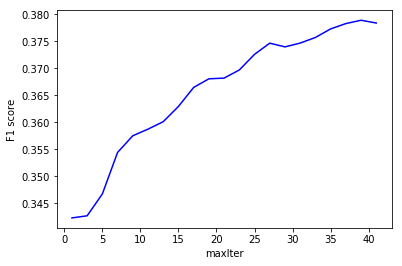

In [61]:
f = plt.figure()
plt.plot(maxIter, validation_results_maxIter, 'b', label='Validation AUC')


plt.ylabel('F1 score')
plt.xlabel('maxIter')
plt.show()

f.savefig('4.pdf') # save the plot

## Validation: Prune the maxDepth

In [70]:
np.linspace(1,21,11)

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.])

In [67]:
# set the max depth parameter equals to 1,3,5,7,...21, and get a list of F1 scores of these 11 models
maxDepth= np.linspace(1,21,11, endpoint = True)
validation_results_maxDepth = []
for item in maxDepth:
    gbt = GBTClassifier(maxDepth=item,labelCol="label")
    gbt_pipeline = Pipeline(stages=[va, gbt]).fit(training_sample)
    f1 =F1_score_cv(gbt_pipeline)
    
    validation_results_maxDepth.append(f1)


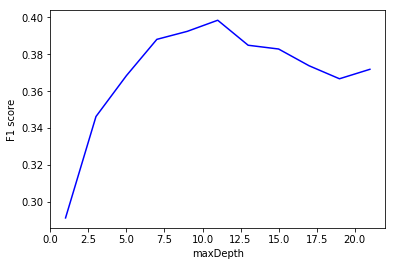

In [68]:
f = plt.figure()
plt.plot(maxDepth, validation_results_maxDepth, 'b', label='Validation AUC')


plt.ylabel('F1 score')
plt.xlabel('maxDepth')
plt.show()

f.savefig('5.pdf')

# Apply the best model (MaxDepth = 11, MaxIter = 38) to Validation data

In [ ]:
## can also be used for demo

In [55]:
gbt_val = GBTClassifier(maxIter=38,maxDepth = 11 ,labelCol="label")
gbt_pipeline_val = Pipeline(stages=[va, gbt_val]).fit(training_sample)


In [56]:
F1_score_cv(gbt_pipeline_val)

0.40540540540540543

## Apply the best model (MaxDepth = 11, MaxIter = 38 ) to Test data

In [75]:
gbt_good = GBTClassifier(maxDepth=11,maxIter = 38,labelCol="label")
gbt_pipeline_good = Pipeline(stages=[va, gbt_good]).fit(training_sample)


In [80]:
original_test = testing_df.select('label').toPandas()

In [81]:
prediction_test = gbt_pipeline_good.transform(testing_df).select('prediction').toPandas()
prediction_test = prediction_test.astype(int)
combine_test = pd.concat([prediction_test,original_test], axis = 1)
df_confusion_test = pd.crosstab(original_test['label'],prediction_test['prediction'])
precision_test = df_confusion_test[1][1]/(df_confusion_test[1][1]+df_confusion_test[1][0])
recall_test = df_confusion_test[1][1]/(df_confusion_test[1][1] + df_confusion_test[0][1])
F1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
F1_test

0.4058744993324433

In [82]:
df_confusion_test

prediction,0,1
label,,
0,66349,3658
1,347,1368


### features importance

In [85]:
pd.DataFrame(list(zip(training_df.columns[1:],gbt_pipeline_good.stages[-1].featureImportances.toArray())),
            columns = ['column', 'weight']).sort_values('weight',ascending = False).head()

,column,weight
5,totalspageviews,0.551790
7,totalstimeOnSite,0.085920
4,totalshits,0.070044
6,totalssessionQualityDim,0.060760
9,Noperatingsystem,0.054816


In [ ]:
gbr_team = gbr(training_df,validation_df, testing_df )
pd.DataFrame(list(zip(inputcol, gbr_team.stages[-1].featureImportances.toArray())),
            columns = ['column', 'weight']).sort_values('weight')

## Demo

In [128]:
## Set the number of interation max depth
max_depth_dm = 11
max_iter_dm = 38


In [129]:
gbt_dm = GBTClassifier(maxDepth=max_depth_dm,maxIter = max_iter_dm,labelCol="label")
gbt_pipeline_dm = Pipeline(stages=[va, gbt_dm]).fit(training_sample)



In [161]:
file = pd.read_csv('demo_rf&gbm.csv',sep = ',') # change the value of features in a csv file and load it

In [162]:
test_demo = spark.createDataFrame(file)

In [163]:
test_sample_dm = test_demo

In [167]:
prediction_dm = gbt_pipeline_dm.transform(test_sample_dm).select('prediction').toPandas()

probability_dm = gbt_pipeline_dm.transform(test_sample_dm).select('probability').toPandas()


In [168]:
prediction_dm

,probability
0,"[0.5973061077266387, 0.4026938922733613]"
